# Credit Card Fraud Detection 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data

In [2]:
# Load dataset
df = pd.read_csv('../data/creditcard.csv')
print(f'Dataset Shape: {df.shape}')
print(f'Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB')
df.head()

Dataset Shape: (284807, 31)
Memory Usage: 67.36 MB


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check for missing values
print('Missing Values:')
print(df.isnull().sum())
#Basic statistics
df.describe()

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Class distribution
fraud_count = df['Class'].value_counts()
print(f'Legitimate: {fraud_count[0]} ({fraud_count[0]/len(df)*100:.2f}%)')
print(f'Fraud: {fraud_count[1]} ({fraud_count[1]/len(df)*100:.2f}%)')

Legitimate: 284315 (99.83%)
Fraud: 492 (0.17%)


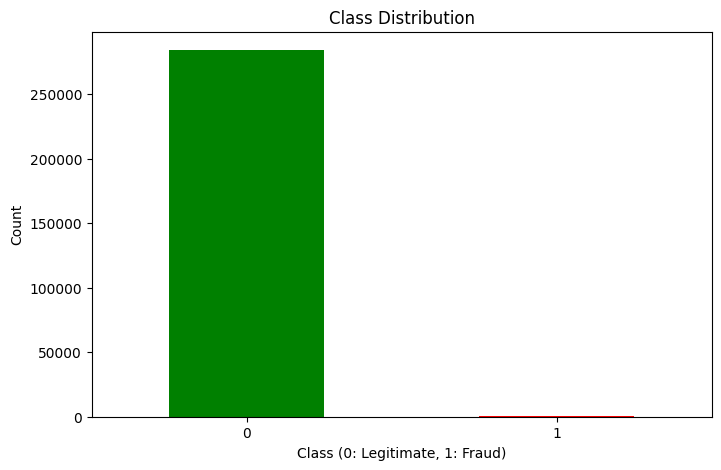

In [5]:
# Visualization
plt.figure(figsize=(8, 5))
fraud_count.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 2. Exploratory Data Analysis

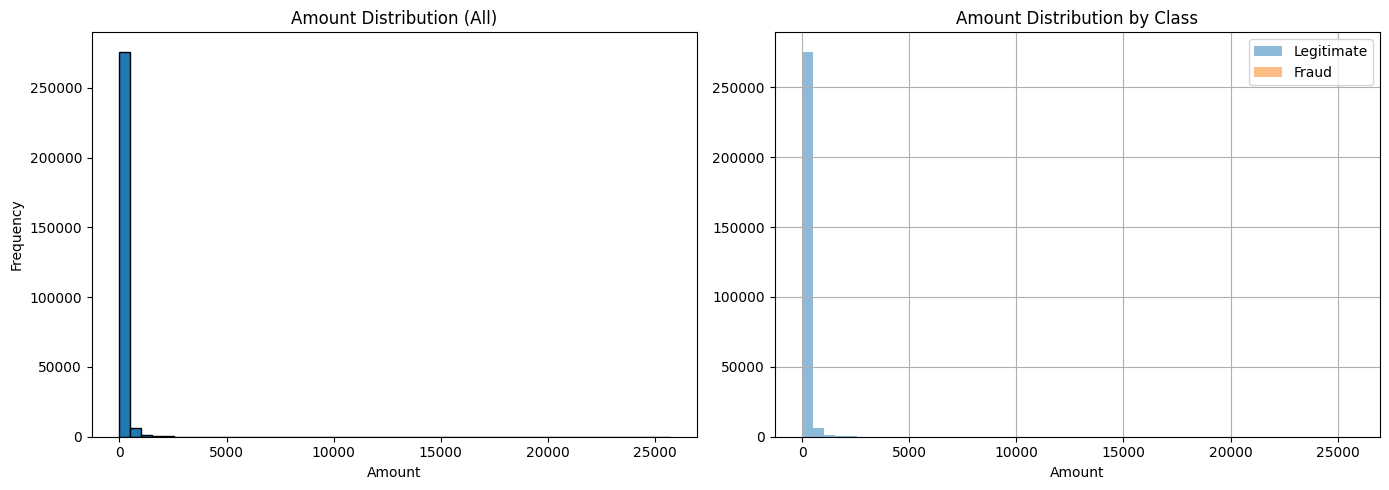

In [6]:
# Amount distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# All transactions
axes[0].hist(df['Amount'], bins=50, edgecolor='black')
axes[0].set_title('Amount Distribution (All)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# By class
df[df['Class']==0]['Amount'].hist(bins=50, alpha=0.5, label='Legitimate', ax=axes[1])
df[df['Class']==1]['Amount'].hist(bins=50, alpha=0.5, label='Fraud', ax=axes[1])
axes[1].set_title('Amount Distribution by Class')
axes[1].set_xlabel('Amount')
axes[1].legend()

plt.tight_layout()
plt.show()

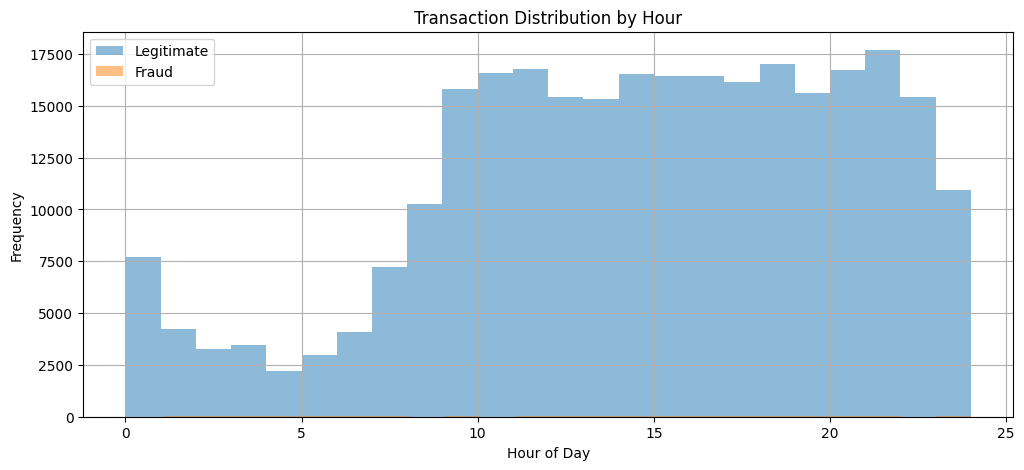

In [7]:
# Time distribution
df['Hour'] = (df['Time'] / 3600) % 24
plt.figure(figsize=(12, 5))
df[df['Class']==0]['Hour'].hist(bins=24, alpha=0.5, label='Legitimate')
df[df['Class']==1]['Hour'].hist(bins=24, alpha=0.5, label='Fraud')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Transaction Distribution by Hour')
plt.legend()
plt.show()

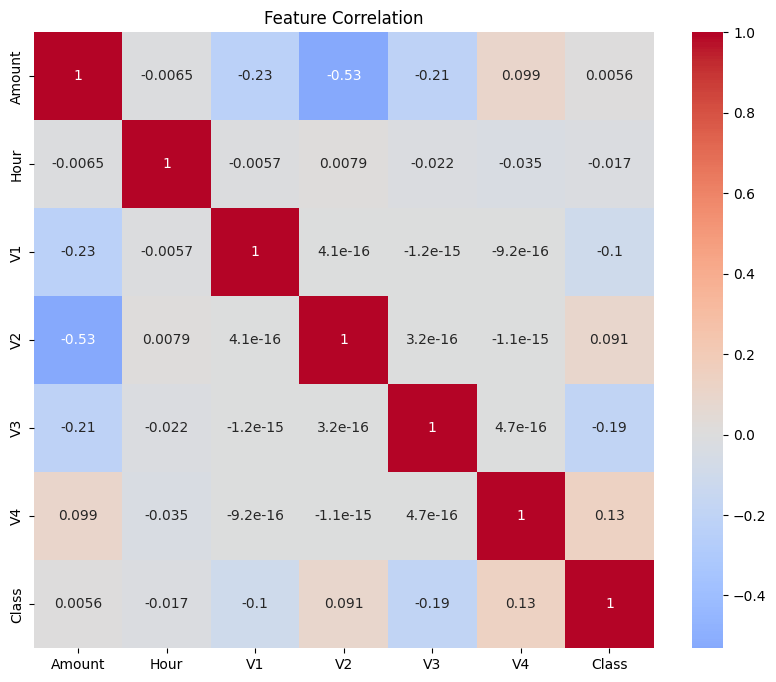

In [8]:
# Correlation heatmap (select features)
plt.figure(figsize=(10, 8))
correlation = df[['Amount', 'Hour', 'V1', 'V2', 'V3', 'V4', 'Class']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation')
plt.show()

## 3. Feature Engineering

In [9]:
# Create additional features
df['Day'] = (df['Time'] / 86400)
df['Amount_log'] = np.log1p(df['Amount'])

# TODO: Add more features during exploration
# Example ideas:
# - Amount bins (small, medium, large)
# - Time of day categories (morning, afternoon, evening, night)
# - Rolling statistics
#print('New features added!')\ndf[['Time', 'Hour', 'Day', 'Amount', 'Amount_log']].head()

## 4. Prepare Data for Modeling

In [10]:
# Prepare features and target
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
print(f'Features: {X.shape[1]}')
print(f'Samples: {len(X)}')

Features: 32
Samples: 284807


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Train set: {X_train.shape}')
print(f'Test set: {X_test.shape}')
print(f'Train fraud rate: {y_train.mean()*100:.3f}%')
print(f'Test fraud rate: {y_test.mean()*100:.3f}%')

Train set: (227845, 32)
Test set: (56962, 32)
Train fraud rate: 0.173%
Test fraud rate: 0.172%


In [12]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f'Original training set: {X_train.shape}')
print(f'Resampled training set: {X_train_res.shape}')
print(f'\\nFraud rate after SMOTE: {y_train_res.mean()*100:.2f}%')

  File "D:\Fraud Detection Project\fraud_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Original training set: (227845, 32)
Resampled training set: (341176, 32)
\nFraud rate after SMOTE: 33.33%


## 5. Model Training

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(6, 12),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=20,     # only try 20 random combinations
    cv=3,
    n_jobs=-1,
    verbose=3
)
search.fit(X_train_res, y_train_res)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015E00ADB7F0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015E00ADB910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015D8110E5C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015D8103BEE0>},
                   verbose=3)

In [18]:
print("Best parameters found:")
print(search.best_params_)
print("Best CV score:", search.best_score_)

Best parameters found:
{'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 267}
Best CV score: 0.9964768915203847


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Building the model with best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=267,
    max_depth=11,
    min_samples_split=9,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',  # keep to handle imbalance
    random_state=42,
    n_jobs=-1
)

# Training on our resampled training data
print("Training Random Forest with best parameters...")
best_rf_model.fit(X_train_res, y_train_res)
print("✓ Model trained!")

Training Random Forest with best parameters...
✓ Model trained!


In [13]:
from xgboost import XGBClassifier

ratio = (len(y_train) - sum(y_train)) / sum(y_train)
print("scale_pos_weight:", ratio)

xgb_model = XGBClassifier(
    n_estimators=400,          
    max_depth=6,               
    learning_rate=0.05,       
    subsample=0.8,             
    colsample_bytree=0.8,     
    scale_pos_weight=ratio,   
    tree_method='hist',        
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

print('Training XGBoost...')
xgb_model.fit(X_train, y_train)
print('✓ XGBoost trained!')


scale_pos_weight: 577.2868020304569
Training XGBoost...
✓ XGBoost trained!


## 6. Model Evaluation

In [21]:
# Evaluate Random Forest
print('='*60)
print('RANDOM FOREST EVALUATION')
print('='*60)
rf_pred = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]
print('Classification Report:')
print(classification_report(y_test, rf_pred, target_names=['Legitimate', 'Fraud']))
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))
rf_auc = roc_auc_score(y_test, rf_proba)
print(f'ROC-AUC Score: {rf_auc:.4f}')

RANDOM FOREST EVALUATION
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.54      0.89      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56791    73]
 [   11    87]]
ROC-AUC Score: 0.9879


In [23]:
# Evaluate XGBoost
print('='*60)
print('XGBOOST EVALUATION')
print('='*60)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
print('Classification Report:')
print(classification_report(y_test, xgb_pred, target_names=['Legitimate', 'Fraud']))
print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_pred))
xgb_auc = roc_auc_score(y_test, xgb_proba)
print(f'ROC-AUC Score: {xgb_auc:.4f}')

XGBOOST EVALUATION
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56852    12]
 [   16    82]]
ROC-AUC Score: 0.9831


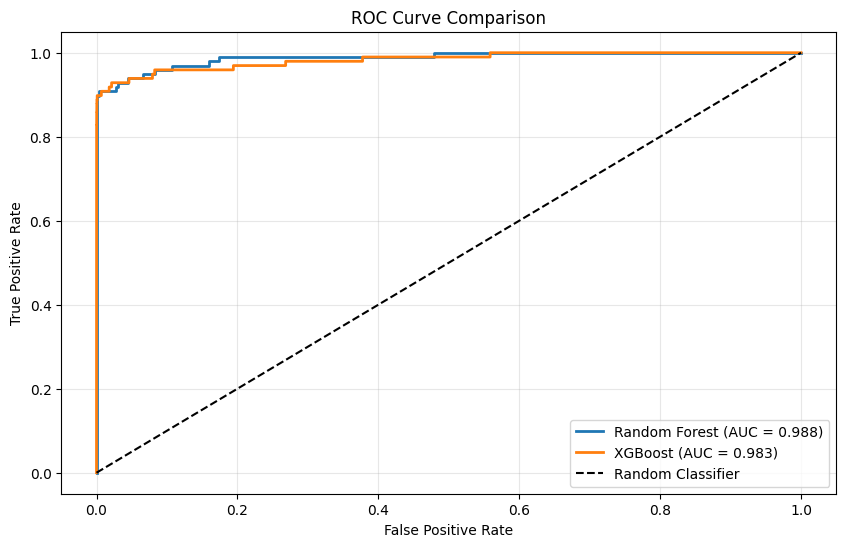

In [24]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 6))
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

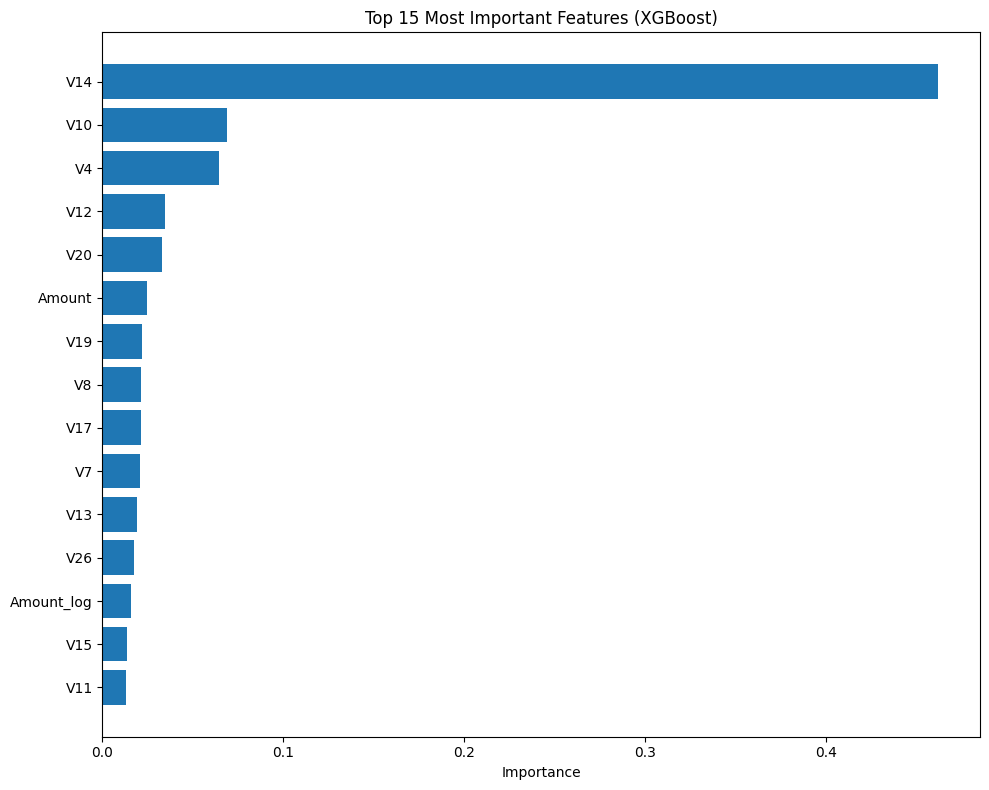

In [25]:
# Feature Importance (XGBoost)
feature_importance = pd.DataFrame({'feature': X.columns,'importance': xgb_model.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

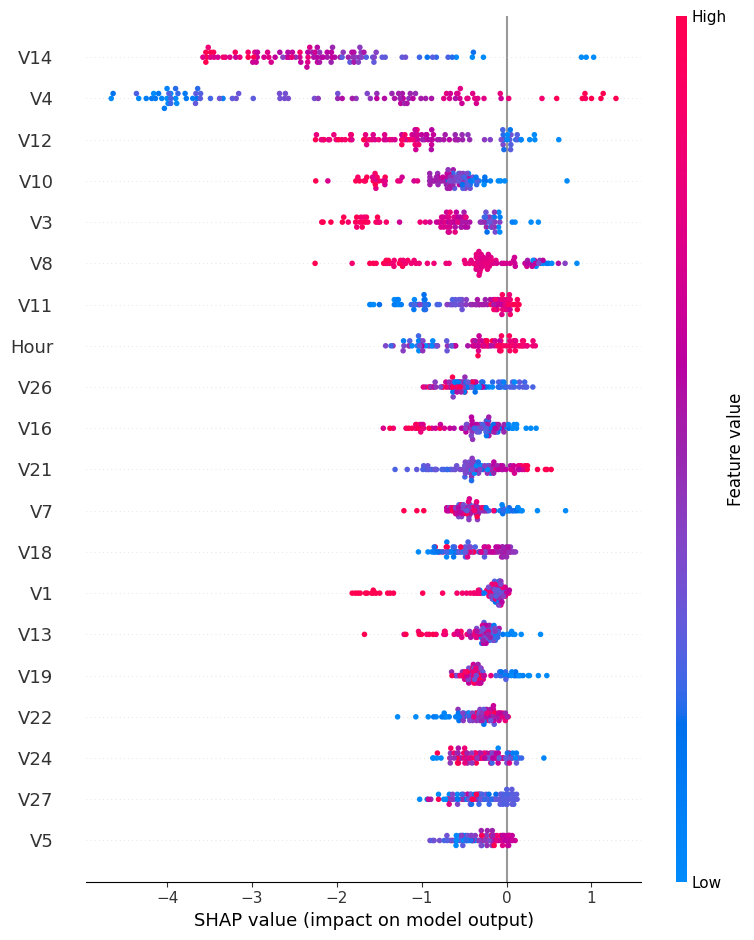

In [26]:
# SHAP Analysis (Quick version)
import shap
# Sample data for faster computation
X_sample = X_test.sample(100, random_state=42)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_sample)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, show=False)
plt.tight_layout()
plt.show()

## 7. Business Impact Analysis

In [27]:
# Cost-Benefit Analysis
# Assumption: False Positive costs $10, False Negative costs $100
cm = confusion_matrix(y_test, xgb_pred)
tn, fp, fn, tp = cm.ravel()
fp_cost = 10  # Customer friction
fn_cost = 100  # Fraud loss
total_cost = (fp * fp_cost) + (fn * fn_cost)
baseline_cost = y_test.sum() * fn_cost  
# If we caught nothing
savings = baseline_cost - total_cost
print('='*60)
print('BUSINESS IMPACT ANALYSIS')
print('='*60)
print(f'True Positives (Fraud Caught): {tp}')
print(f'False Positives (False Alarms): {fp} → Cost: ${fp * fp_cost:,}')
print(f'False Negatives (Missed Fraud): {fn} → Cost: ${fn * fn_cost:,}')
print(f'True Negatives (Correct): {tn}')
print(f'Total Cost with Model: ${total_cost:,}')
print(f'Baseline Cost (No Model): ${baseline_cost:,}')
print(f'💰 Total Savings: ${savings:,}')
print(f'📊 Cost Reduction: {(savings/baseline_cost)*100:.1f}%')

BUSINESS IMPACT ANALYSIS
True Positives (Fraud Caught): 82
False Positives (False Alarms): 12 → Cost: $120
False Negatives (Missed Fraud): 16 → Cost: $1,600
True Negatives (Correct): 56852
Total Cost with Model: $1,720
Baseline Cost (No Model): $9,800
💰 Total Savings: $8,080
📊 Cost Reduction: 82.4%


## 8. Save Best Model

In [29]:
import joblib
import os
# Creating models directory
os.makedirs('../models', exist_ok=True)
# Choose best model (XGBoost in this case)
best_model = xgb_model
# Save model
joblib.dump(best_model, '../models/fraud_detection_model.pkl')
joblib.dump(X.columns.tolist(), '../models/feature_names.pkl')
print('✓ Model saved to ../models/fraud_detection_model.pkl')
print('✓ Feature names saved to ../models/feature_names.pkl')
print('Ready for deployment!')

✓ Model saved to ../models/fraud_detection_model.pkl
✓ Feature names saved to ../models/feature_names.pkl
Ready for deployment!
